#**LOGISTIC REGRESSION** for Advertisement dataset

<a href="https://colab.research.google.com/github/dphi-official/Data_Science_Bootcamp/blob/master/Week3/Logistic_Regression/Logistic_Regression_Advertisement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression (Code Implementation)

In this notebook we will be working with a **advertising data set**, indicating whether or not a particular internet user clicked on an Advertisement on a company website.

We will try to create a model that will **predict whether or not they will click on an ad based on the features (or data) gather for a particular user**.


---


This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad


---



## Loading Libraries
All Python capabilities are not loaded to our working environment by default (even they are already installed in your system). So, we import each and every library that we want to use.

In data science, numpy and pandas are most commonly used libraries. Numpy is required for calculations like means, medians, square roots, etc. Pandas is used for data processin and data frames. We chose alias names for our libraries for the sake of our convenience (numpy --> np and pandas --> pd).

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import pandas as pd                   # Data analysis and manipulation tool
import numpy as np                    # A fundamental package for scientific computing with Python
import matplotlib.pyplot as plt       # For interactive visualization in Python
import seaborn as sns                 # Data visualization library based on matplotlib. It provides a high-level interface
                                      # for drawing attractive and informative statistical graphics.

## 1.Loading Data
Pandas module is used for reading files. We have our data in '.csv' format. We will use 'read_csv()' function for loading the data.

**Read in the advertisement_data.csv file and set it to a data frame called data.**

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Logistic-Regression/master/advertisement_data.csv')

**Check the head of data**

Let's check how our data looks. This can be done using head() method.

In [3]:
data.head()             # Returns first five observations / records from the data.

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 0:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 1:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 2:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 3:36:18,0


In [4]:
data.info()          # Returns a concise summary of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
# Basic statistical details
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## 2.Exploratory Data Analysis

Text(0, 0.5, 'Number of data points')

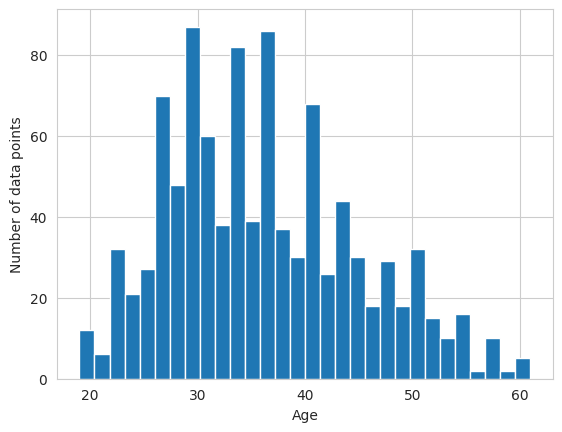

In [6]:
# Plotting histogram of the age variable
sns.set_style('whitegrid')            # sets the style of the plots; it affects things like color of the axes, whether grid enabled or not.
data['Age'].hist(bins=30)             # plots histogram with with bins = 30
plt.xlabel('Age')                     # labels the x - axis as 'Age'
plt.ylabel('Number of data points')   # labels y - axis as 'Number of data points'


* Most of the people are in the age range of 25 years to 50 years
* The data seems to be normally distributed.

**Create a jointplot showing Area Income versus Age.**

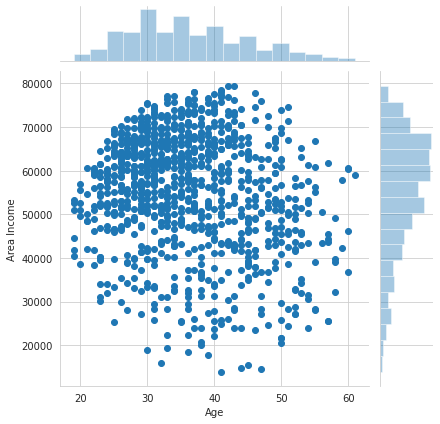

In [ ]:
# Joint plot for 'Area Income' and 'Age'
# Plots two variables with bivariate and univariate graphs
sns.jointplot(x='Age',y='Area Income',data=data)

We can observe from the above jointplot that the average income of the customer in geographical area where the customer is aged in range 20 to 40 is higher. One can also notice that as the age of the customer increases the average income of that geographical area is decreasing i.e. there is a little negative correlation between age of customer and the average income of that area (one can observe this from the below regression plot).

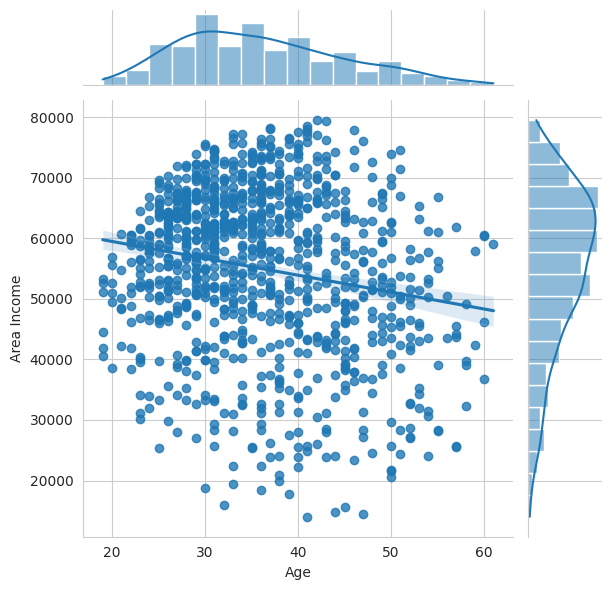

In [7]:
sns.jointplot(x='Age',y='Area Income',data=data, kind = 'reg')    # with regression line in the scatter plot and kernel density curve in both histograms

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

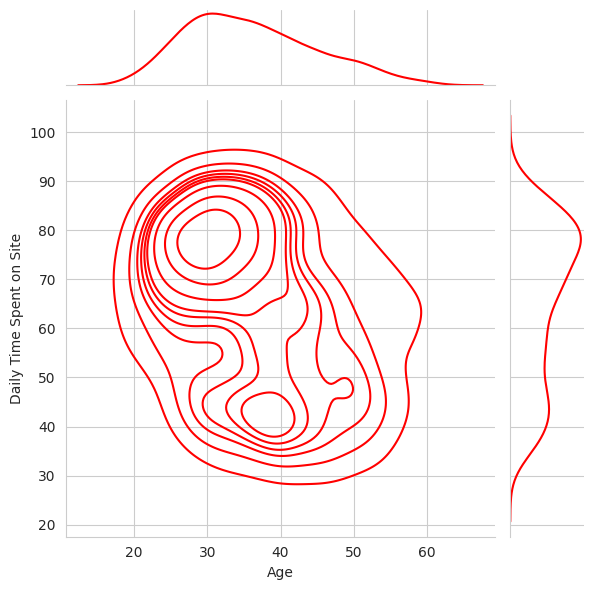

In [9]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=data,color='red',kind='kde')    # will show joint plot with kernel density estimates

The above plot is showing which region has maximum density of customers and Daily time spent on the site. The customer in the range 20 to 40 is more in count and they spent around 65 to 90 minutes on the site.

**Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

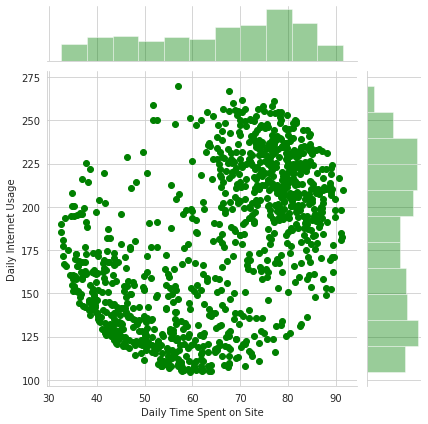

In [ ]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=data,color='green')

There are very few customers with less internet usage than the average internet use. Customers who spent 35 to 65 minutes on the site are averagely less than 175 minutes on the internet and those who spent 70 to 85 minutes on the site are averagely more than 180-185 minutes on the internet.

**Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

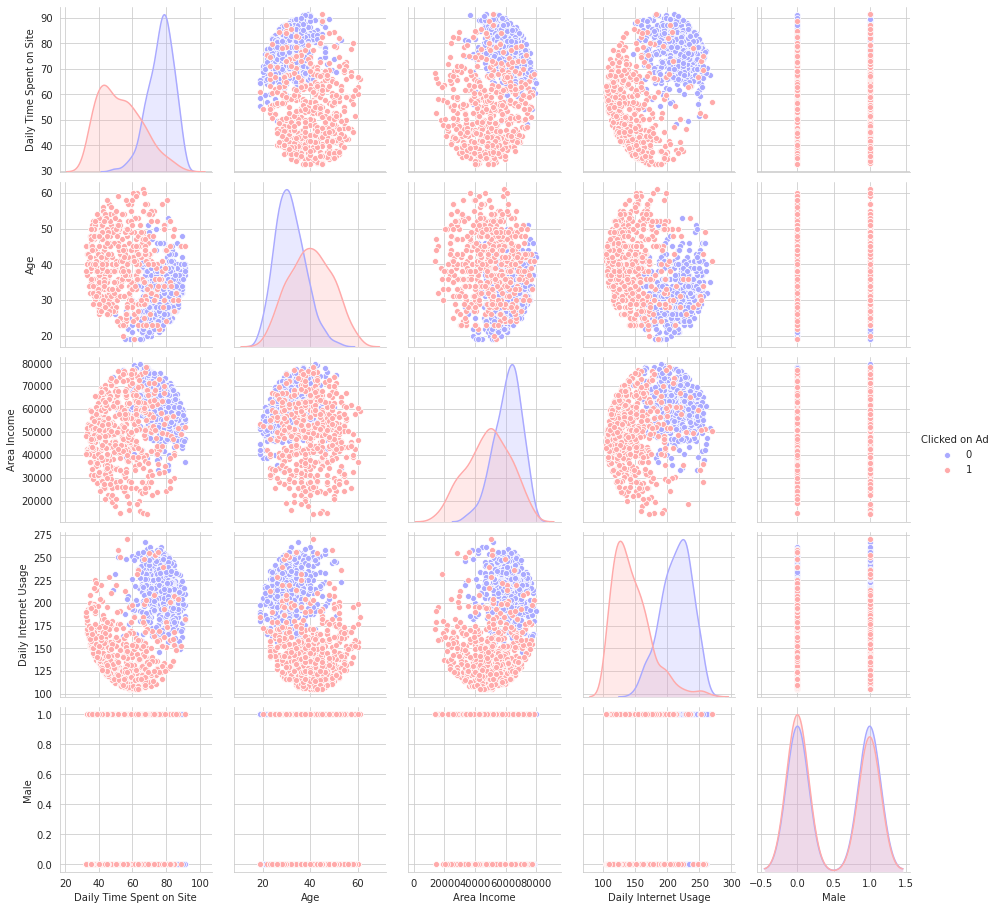

In [ ]:
sns.pairplot(data,hue='Clicked on Ad',palette='bwr')     # plots pairwise relationships between different features
                                                         # 'hue' will separate people who clicked on add from people who did not clicked on add

One can observe from the above pairplot:

1. The customer who averagely uses 175 minutes internet per day (Daily Internet usage) clicks the add.
2. The customer who spend less than 60 minutes on the site per day (Daily Time Spent on Site) clicks the add.


# Split the data into train and test set

In [10]:
# Separate feature columns and target column
# We have freedom to chose features on which we want to train our model
X = data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]   # feature columns
y = data['Clicked on Ad']     # target column

In [11]:
# train_test_split is used to split the dataset into test set and train set
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# X_train: independent feature data for training the model
# y_train: dependent feature data for training the model
# X_test: independent feature data for testing the model; will be used to predict the target values
# y_test: original target values of X_test; We will compare this values with our predicted values.

# test_size = 0.30: 30% of the data will go for test set and 70% of the data will go for train set
# random_state = 42: this will fix the split i.e. there will be same split for each time you run the code

## 3.Train a Logistic Regression model


In [13]:
print("Original shape of dataset: {}".format(data.shape))         # shape of original dataset
print("Shape of training dataset: {}".format(X_train.shape))      # shape of training dataset after split
print("Shape of testing dataset: {}".format(X_test.shape))        # shape of testing dataset after split

Original shape of dataset: (1000, 10)
Shape of training dataset: (700, 5)
Shape of testing dataset: (300, 5)


**Train and fit a logistic regression model on the training set.**

In [14]:
# Import the Logistic Regression class from sklear.linear_model
from sklearn.linear_model import LogisticRegression

In [16]:
log_model = LogisticRegression()      # creating object 'logmodel' for LogisticRegression class
log_model.fit(X_train,y_train)        # Fitting the model

LogisticRegression()

## 4. Prediction
**Now predict values for the testing data.**

In [17]:
predictions = log_model.predict(X_test)     # predict for test data i.e. X_test

In [18]:
# look at the prected values
predictions

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0])

In [19]:
len(predictions)    # we have 300 records in X_test, so we have 300 predicted values

300

# Evaluation Metrics
Evaluating machine learning algorithm is an important part of any project.
Here we will use accuracy score to evaluate our model.

In [ ]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(y_test,predictions))

# y_test: the original target values that we have for X_test, predictions: we predicted target for X_test using our model

0.8966666666666666


Our model is predicting 89.6% correct results.

### **Thanks for reading the Notebook!!!**